 # **Spam Email Detection**

---
****

##Import Libraries

In [104]:
# Loan Default Prediction
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

from warnings import filterwarnings

## Load The Dataset

In [70]:
# Load the data
df = pd.read_csv('/content/spam_ham_dataset.csv.zip')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


## Statistical Analysis About the Data

In [71]:
df.shape

(5171, 4)

In [72]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


## Pre - Processing Data

### Checking for Null Values

In [73]:
#Checking for null values
print(df.isna().sum())

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


### Feauture Scaling

In [74]:
#dropping ID
df=df.drop(columns="Unnamed: 0")

### Split the data into features and labels


In [75]:
x = df.drop(['label', 'label_num'], axis=1)
y = df['label_num']

### Split the data into training and testing sets

In [76]:

#slipting into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(3878, 1)
(3878,)
(1293, 1)
(1293,)


###Perform feature scaling

In [77]:
# Identify the categorical columns in the dataset
categorical_cols = ['text']

# Create a column transformer to apply one-hot encoding to the categorical columns
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)], remainder='passthrough')


# Fit and transform the training data
x_train_encoded = preprocessor.fit_transform(x_train)

# Transform the test data
x_test_encoded = preprocessor.transform(x_test)

### logistic Regression

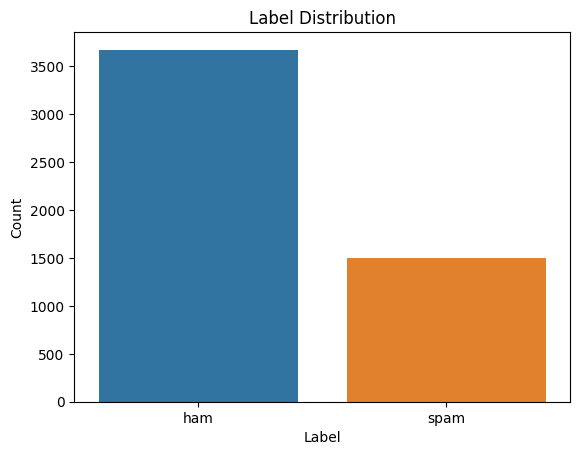

Accuracy of the model is 71.69
0.021390374331550804


In [106]:
#Applying logistic Regression
model=LogisticRegression()
model.fit(x_train_encoded,y_train)

#predicting the Results
y_pred = model.predict(x_test_encoded)

#Confusion matrix
confusion_matrix(y_test,y_pred)

label_counts = df['label'].value_counts()

# Create a bar plot
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()

#Calculating the Accuracy
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))


### Support Vector Machine

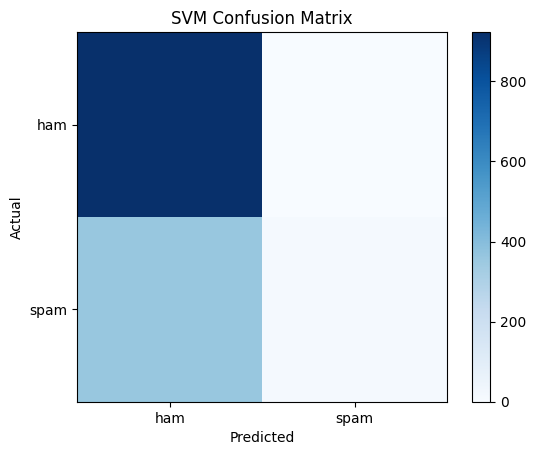

Accuracy of the model is 72.24
0.05774278215223098


In [107]:
# Support Vector Machine classification
svm_model = SVC()

svm_model.fit(x_train_encoded,y_train)

svm_y_pred = svm_model.predict(x_test_encoded)

svm_cm = confusion_matrix(y_test, svm_y_pred)

plt.imshow(svm_cm, cmap=plt.cm.Blues)
plt.title("SVM Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], labels=['ham', 'spam'])
plt.yticks([0, 1], labels=['ham', 'spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

accuracy=accuracy_score(y_test, svm_y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))


### Random Forest

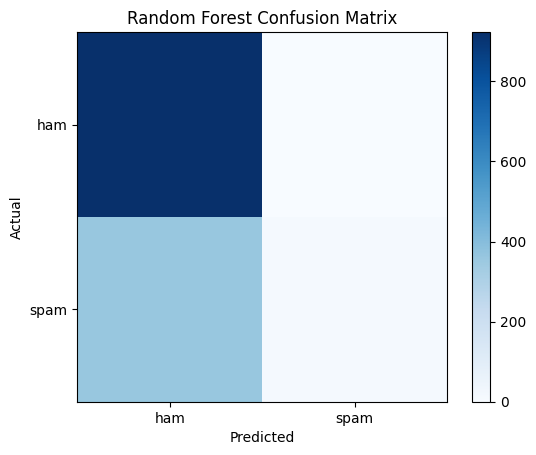

Accuracy of the model is 72.24
0.05774278215223098


In [108]:
# Random Forest classification
rf_model = RandomForestClassifier()
rf_model.fit(x_train_encoded,y_train)

rf_y_pred = rf_model.predict(x_test_encoded)

# Compute the confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_y_pred)

# Plotting the confusion matrix for Random Forest
plt.imshow(rf_cm, cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], labels=['ham', 'spam'])
plt.yticks([0, 1], labels=['ham', 'spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

accuracy=accuracy_score(y_test, rf_y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))


### Gradient Descent

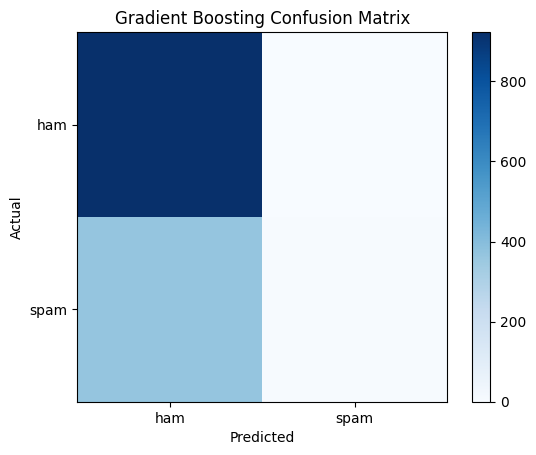

Accuracy of the model is 71.69
0.021390374331550804


In [109]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train_encoded,y_train)

# Predict the labels for the test data
gb_y_pred = gb_model.predict(x_test_encoded)

# Compute the confusion matrix for Gradient Boosting
gb_cm = confusion_matrix(y_test, gb_y_pred)

# Plotting the confusion matrix for Gradient Boosting
plt.imshow(gb_cm, cmap=plt.cm.Blues)
plt.title("Gradient Boosting Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], labels=['ham', 'spam'])
plt.yticks([0, 1], labels=['ham', 'spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

accuracy=accuracy_score(y_test, gb_y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))


### Naive Bayes

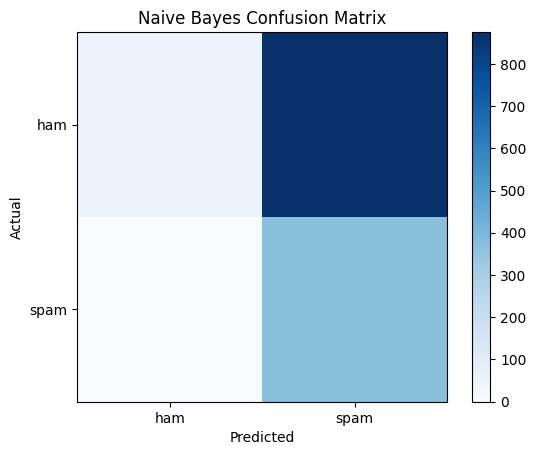

Accuracy of the model is 32.33


In [103]:
# Convert sparse matrix to dense array
X_train_dense = x_train_encoded.toarray()
X_test_dense = x_test_encoded.toarray()

# Gaussian Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train_dense,y_train)

# Predict the labels for the test data
nb_y_pred = nb_model.predict(X_test_dense)

# Compute the confusion matrix for Naive Bayes
nb_cm = confusion_matrix(y_test, nb_y_pred)

# Plotting the confusion matrix for Naive Bayes
plt.imshow(nb_cm, cmap=plt.cm.Blues)
plt.title("Naive Bayes Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], labels=['ham', 'spam'])
plt.yticks([0, 1], labels=['ham', 'spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

accuracy=accuracy_score(y_test, nb_y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))